--
jupyter:
  jupytext:
    text_representation:
      extension: .md
      format_name: markdown
      format_version: '1.3'
      jupytext_version: 1.18.1
  kernelspec:
    display_name: Python (myenv)
    language: python
    name: neural-network
---

# Table of Contents
<div class="lev1 toc-item"><a href="#Exercise-2.1.-Minimizing-a-quadratic-function-and-the-curse-of-dimensionality" data-toc-modified-id="Exercise-2.1.-Minimizing-a-quadratic-function-and-the-curse-of-dimensionality-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Exercise 2.1. Minimizing a quadratic function and the curse of dimensionality</a></div><div class="lev1 toc-item"><a href="#Exercise-2.2.-Implementing-random-search-in-Python" data-toc-modified-id="Exercise-2.2.-Implementing-random-search-in-Python-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Exercise 2.2. Implementing random search in Python</a></div><div class="lev1 toc-item"><a href="#Exercise-2.3.-Using-random-search-to-minimize-a-nonconvex-function" data-toc-modified-id="Exercise-2.3.-Using-random-search-to-minimize-a-nonconvex-function-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Exercise 2.3. Using random search to minimize a nonconvex function</a></div><div class="lev1 toc-item"><a href="#Exercise-2.4.-Random-search-with-diminishing-steplength" data-toc-modified-id="Exercise-2.4.-Random-search-with-diminishing-steplength-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Exercise 2.4. Random search with diminishing steplength</a></div><div class="lev1 toc-item"><div class="lev1 toc-item"><a href="#Exercise-2.8.-Coordinate-search-applied-to-minimize-a-simple-quadratic" data-toc-modified-id="Exercise-2.8.-Coordinate-search-applied-to-minimize-a-simple-quadratic-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Exercise 2.8. Coordinate search applied to minimize a simple quadratic</a></div><div class="lev1 toc-item"><a href="#Exercise-2.9.-Coordinate-search-with-diminishing-steplength" data-toc-modified-id="Exercise-2.9.-Coordinate-search-with-diminishing-steplength-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Exercise 2.9. Coordinate search with diminishing steplength</a></div><div class="lev1 toc-item"></div>

In [6]:
# import basic libraries and autograd wrapped numpy
import autograd.numpy as np
import copy
import matplotlib.pyplot as plt


# this is needed to compensate for matplotlib notebook's tendancy to blow up images when plotted inline
%matplotlib notebook
from matplotlib import rcParams
rcParams['figure.autolayout'] = True

# Exercise 2.1. Minimizing a quadratic function and the curse of dimensionality

In this experiment you will verify the *curse of dimensionality* issue associated with the use of randomly sampled points for naive evaluation for the simple quadratic function

$$
g(\mathbf{w}) = \mathbf{w}^T\mathbf{w}
$$

whose minimum is always $g(\mathbf{0}_{N\times 1}) = 0$ regardless of the input dimension $N$.

Here you need to create a range of these quadratics for input dimension $N=1$ to $N = 100$.  Below you will find a Python function defining such a quadratic for general input dimension $N$.

In [7]:
# a function defining a a simple, N dimensional quadratic function g(\mathbf{w}) = \mathbf{w}^T\mathbf{w}
def quadratic(x):
    return np.dot(x.T,x)

You can evaluate this function using any (real) input you like.  Some examples are given below.

In [8]:
# an example where N=1
x=np.array([1])
print('an N=1 example=> here x=np.array([1]), and quadratic(x)=',quadratic(x))

# an example where N=4
x = np.array([1,2,3,4])
print('an N=4 example=> here x=np.array([1,2,3,4]), and quadratic(x)=',quadratic(x))

an N=1 example=> here x=np.array([1]), and quadratic(x)= 1
an N=4 example=> here x=np.array([1,2,3,4]), and quadratic(x)= 30


Now you want to sample the input space of each quadratic of this kind for dimensions $N=1,..,100$ a total of $10,000$ times each, randomly and uniformly on the hypercube $[-1,1]\times [-1,1] \times \cdots \times [-1,1]$ (this hypercube has $N$ sides).  

You can produce a random number on the interval $[-1,1]$ as shown below.

In [9]:
# a random number on the interval [-1,1]
2*np.random.rand(1)-1

array([-0.71898473])

If you need to create an $N$ dimensional version of this - you can use the general pattern below.

In [10]:
# a vector of dimension N where each entry is randomly chosen on the interval [-1,1]
N=4
2*np.random.rand(1,4)-1

array([[-0.5981775 , -0.23943697, -0.29682278, -0.77295687]])

With these components in had, generate a plot illustrating the value of this quadratics of dimension $N=100$, $N=1000$, and $N=10000$ by sampling  $100$, $1,000$, and $10,000$ times respectively and averaging. See the text of this problem for further details.

[np.float64(1.7165290788786136e-05), np.float64(-0.83698307029182), np.float64(-0.8400782521414647), np.float64(-0.8746818725146803), np.float64(-0.9219568549917762), np.float64(-0.9369887432872722), np.float64(-0.977132275805048), np.float64(-0.9434230071716555), np.float64(-0.973843112326625), np.float64(-0.993731589878766), np.float64(-0.9791045235940692), np.float64(-0.9875563336378863), np.float64(-0.9697621767898381), np.float64(-0.9866385774476524), np.float64(-0.9811456780279717), np.float64(-0.9795551517609196), np.float64(-0.9830883864549403), np.float64(-0.9887356908928228), np.float64(-0.9919284099294206), np.float64(-0.9907060700505802), np.float64(-0.9870327412596728), np.float64(-0.9843784143632347), np.float64(-0.9841349891783306), np.float64(-0.9870569581046971), np.float64(-0.9869626268085219), np.float64(-0.9950112580144704), np.float64(-0.9906845774762008), np.float64(-0.9958795789799625), np.float64(-0.9875673487746123), np.float64(-0.9948387267025912), np.float64(

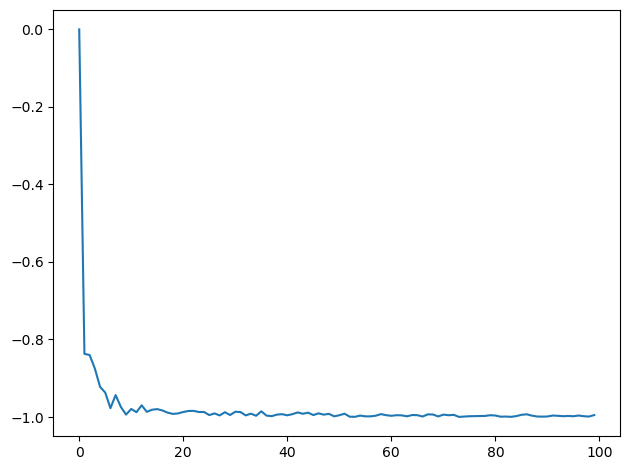

In [12]:
# a) For N = 1 to 100, sample 100 points (per dim evaluated) and plot min for each dim

def get_rand(n):
  if n == 1:
    return 2*np.random.rand(1)-1
  else:
    return 2*np.random.rand(1,n)-1

def get_unif(n):
  return 2*np.random.uniform(1,n)-1

min_vals = []
for n in range(100):
  min_val = 1 # init as highest possible value
  for p in range(100):
    res = np.min( quadratic(get_rand(n + 1)) )
    if res < min_val:
      min_val = res
  min_vals.append(min_val)

# print(min_vals)

%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(np.arange(100), min_vals)
plt.show()


# Exercise 2.2. Implementing random search in Python

Below we have a ``Python`` wrapper providing a skeleton for your production of of the random local search algorithm.  All parts marked "TO DO" are for you to construct.

In [9]:
# random search function
def random_search(g,alpha,max_its,w,num_samples):
    # run random search
    weight_history = []         # container for weight history
    cost_history = []           # container for corresponding cost function history
    alpha = 0
    for k in range(1,max_its+1):                    
        # record weights and cost evaluation
        weight_history.append(w)
        cost_history.append(g(w))
        
        # construct set of random unit directions
        ##  TO DO 
        
        ### pick best descent direction
        ## TO DO
        
        # evaluate all candidates
        evals = np.array([g(w_val) for w_val in w_candidates])

        # check directions to ensure a real descent direction to take the step in its direction
        ## TO DO
        
    # record weights and cost evaluation
    weight_history.append(w)
    cost_history.append(g(w))
    return weight_history,cost_history

Notice that the history of function evaluations returned is called ``cost_history``.  This is because - in the context of machine learning / deep learning - mathematical functions are often referred to as *cost* or *loss* functions.

When you are done, plot the cost function history associated with your run.  See the text for further details.

# Exercise 2.3. Using random search to minimize a nonconvex function

Use your completed work from the previous exercises to minimize the function

\begin{equation}
g(w_0,w_1) = \text{tanh}(4w_0 + 4w_1) + \text{max}(0.4w_0^2,1) + 1
\end{equation}

using random local search again setting $P = 1000$ and 8 steps with $\alpha = 1$ for all steps. 

# Exercise 2.4. Random search with diminishing steplength

Use the random search algorithm to minimize a famous optimization test function called the *Rosenbrock function* which takes the form

\begin{equation}
g\left(w_0,w_1\right) = 100\left(w_1 - w_0^2\right)^2 + \left(w_0 - 1\right)^2.
\end{equation}

This function (whose contour plot is shown in the text) has a global minimum at the point $\mathbf{w}^{\star} = \begin{bmatrix} 1 \\ 1 \end{bmatrix}$ located in a very narrow and curved valley.

Now we make the same run but use the diminishing steplength rule $\alpha = \frac{1}{k}$. 

# Exercise 2.8. Coordinate search applied to minimize a simple quadratic

Below we provide a skeleton wrapper for coordinate search algorithm.  All parts marked "TO DO" are for you to construct.

In [11]:
# zero order coordinate search
def coordinate_search(g,alpha,max_its,w):
    # construct set of all coordinate directions
    directions_plus = np.eye(np.size(w),np.size(w))
    directions_minus = - np.eye(np.size(w),np.size(w))
    directions = np.concatenate((directions_plus,directions_minus),axis=0)
        
    # run coordinate search
    weight_history = []         # container for weight history
    cost_history = []           # container for corresponding cost function history
    for k in range(1,max_its+1):                    
        # record weights and cost evaluation
        weight_history.append(w)
        cost_history.append(g(w))
        
        ### pick best descent direction
        # compute all new candidate points
        ## TO DO
        
        # evaluate all candidates
        ## TO DO

        # if we find a real descent direction take the step in its direction
         ## TO DO 
            
    # record weights and cost evaluation
    weight_history.append(w)
    cost_history.append(g(w))
    return weight_history,cost_history

Now compare 5 steps of the random search algorithm (with $P = 1000$ random directions tested at each step) to 7 steps of coordinate search, using the same starting point $\mathbf{w}^0 = \begin{bmatrix}3 \\ 4\end{bmatrix}$ and fixed steplength parameter value $\alpha = 1$ for both.  

The test function in this case is the simple quadratic used in several of the examples of the previous Section

\begin{equation}
g(w_0,w_1) = w_0^2 + w_1^2 + 2.
\end{equation}

# Exercise 2.9. Coordinate search with diminishing steplength

Compare 5 steps of the random search algorithm (with $P = 1000$ random directions tested at each step) to 5 steps of coordinate search, using the same starting point $\mathbf{w}^0 = \begin{bmatrix}3 \\ 4\end{bmatrix}$ and fixed steplength parameter value $\alpha = 1$ for both.  The test function in this case is a skewed quadratic function

\begin{equation}
g(w_0,w_1) = 0.26\left(w_0^2 + w_1^2\right) - 0.48w_0w_1
\end{equation}

By making the steplength parameter smaller we can encourage coordinate search to find its way towards the function's minimum at the origin.  Re-run coordinate search using a diminishing steplength parameter $\alpha = \frac{1}{k}$ at the $k^{th}$ step for $1000$ steps.  With this run the method gets much closer to the function minimum.  